In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#setting up notebook, importing packages and reading data set
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

import sklearn.model_selection
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv('assessment_dsml1_train.csv')
df.head()

,x1,x2,x3,x4,x5,y
0,14.402769,-17.673518,-2.874400,-21.071444,7.890294,-527.310172
1,-15.330027,-3.447020,3.758340,14.009959,2.578133,350.330084
2,13.967546,-13.492742,-1.719984,-17.401402,7.523179,-397.975499
3,-8.150049,-4.626950,3.295337,11.341428,1.727920,280.431968
4,-8.626102,7.083813,-2.470631,1.979232,-0.400740,172.258502


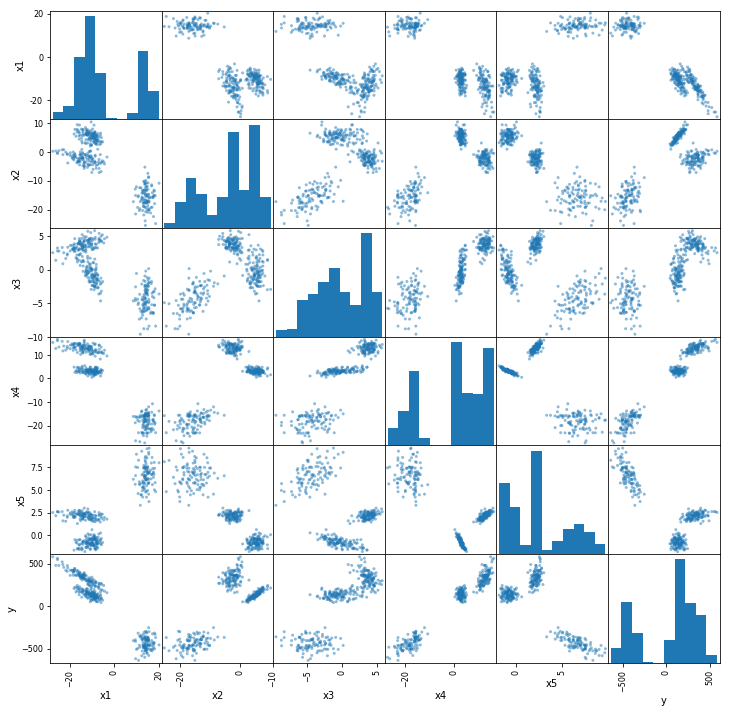

In [10]:
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

In [11]:
X = df[[c for c in df if c != 'y']].values
y = df['y'].values

In [14]:
X.shape

(334, 5)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE (Train): 45.426710034796955
RMSE (Test): 39.3123420206713


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
predict_one = lambda x: model.predict([x])[0]

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

RMSE (Train): 12.300634196577036
RMSE (Test): 31.222559746394094


In [18]:
#to scale the data, then cluster it

import sklearn.preprocessing

X1 = X[:300, :] #splitting the data into two sets
X2 = X[300:, :]
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X1)  # scaler learns the geometry and uses it to "re-scale"...
                # ... (stretch/squeeze/shift) the data
XX1 = scaler.transform(X1)

#plt.scatter(XX1[:,0], XX1[:,1])
#plt.show()


In [20]:
XX1.shape

(300, 5)

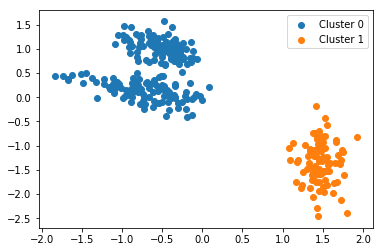

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(XX1)

for c in set(model.labels_):
    plt.scatter(XX1[model.labels_ == c, 0], XX1[model.labels_ == c, 1], label="Cluster {}".format(c))
plt.legend()
plt.show()

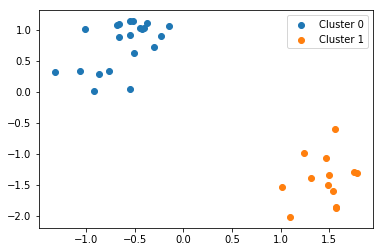

In [23]:
#"testing" the clustering, with the last 10% of the data set.
XX2 = scaler.transform(X2)  # transform using same scaler
y_pred = model.predict(XX2)  # assign labels to "new" data
for c in set(y_pred):
    plt.scatter(XX2[y_pred == c, 0], XX2[y_pred == c, 1], label="Cluster {}".format(c))
plt.legend()
plt.show()

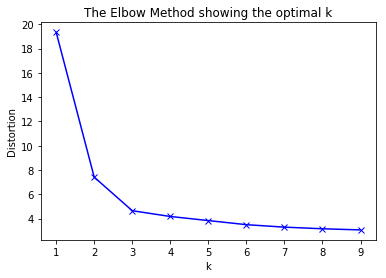

In [25]:
#data exploration to determine optimal number of clusters

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#hence, the optimal number of clusters is 3.

In [28]:
#creating predictor
def make_predictor(X, y):
    #ss = sklearn.preprocessing.StandardScaler()
    #X_scaled = ss.fit_transform(X)
    
    X, y  = make_blobs(n_samples=333, centers=2 , random_state=1)

    #X *= np.array([[1, 10]])
    #X += np.array([[-30, 10]])

    #X1 = X[:300, :] #splitting the data into two sets
    #X2 = X[300:, :]
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(X1)  # scaler learns the geometry and uses it to "re-scale"...
                    # ... (stretch/squeeze/shift) the data
    XX1 = scaler.transform(X1)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(XX1, y)

    def predict(x):
        XX1 = ss.transform([x])
        return model.predict(XX1)[0]

    predict = lambda X: np.array([predict_one(x) for x in X])

    return predict_one, predict

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predict = make_predictor(X_train, y_train)
print('RMSE (train):', np.sqrt(sklearn.metrics.mean_squared_error(y_train, predict(X_train))))
print('RMSE (test):', np.sqrt(sklearn.metrics.mean_squared_error(y_test, predict(X_test))))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print('RMSE (Train): {}'.format(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print('RMSE (Test): {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

ValueError: Found input variables with inconsistent numbers of samples: [300, 333]